In [13]:
import torch
import pickle
from sklearn.linear_model import LogisticRegression
from Model import *
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from imp import reload 

import Model
reload(Model)

<module 'Model' from '/home/ec2-user/SageMaker/OR_v2/Model.py'>

In [14]:
test = pd.read_csv('../test.csv', header=0)
print (test.columns)

## Have all the other varaibles
other = pd.read_csv('../other.csv', header=0)
print (other.columns)

print (test.shape)
print (other.shape)

Index(['user_id', 'offer_id', 'redeem_date', 'cat_brand_sums[0]',
       'cat_brand_sums[1]', 'cat_brand_sums[2]', 'cat_brand_sums[3]',
       'cat_brand_sums[4]', 'cat_brand_sums[5]', 'cat_brand_sums[6]',
       ...
       'id_catBrd_1081', 'id_catBrd_1082', 'id_catBrd_1083', 'id_catBrd_1084',
       'id_catBrd_1085', 'id_catBrd_1086', 'id_catBrd_1087', 'id_catBrd_1088',
       'id_catBrd_1089', 'target'],
      dtype='object', length=2287)
Index(['user_id', 'offer_id', 'redeem_date', 'facebook_authhot_[0]',
       'facebook_authhot_[1]', 'google_authhot_[0]', 'google_authhot_[1]',
       'statehot_[0]', 'statehot_[1]', 'statehot_[2]', 'statehot_[3]',
       'statehot_[4]', 'statehot_[5]', 'statehot_[6]', 'statehot_[7]',
       'statehot_[8]', 'statehot_[9]', 'statehot_[10]', 'statehot_[11]',
       'statehot_[12]', 'statehot_[13]', 'statehot_[14]', 'statehot_[15]',
       'statehot_[16]', 'statehot_[17]', 'statehot_[18]', 'statehot_[19]',
       'statehot_[20]', 'statehot_[21]', 'sta

In [15]:
other_keep = ['user_id', 'offer_id', 'redeem_date', 'facebook_authhot_[0]', 'facebook_authhot_[1]', 'google_authhot_[0]', 'google_authhot_[1]', 'statehot_[0]', 
              'statehot_[1]', 'statehot_[2]', 'statehot_[3]', 'statehot_[4]', 'statehot_[5]', 'statehot_[6]', 'statehot_[7]', 'statehot_[8]', 'statehot_[9]', 
              'statehot_[10]', 'statehot_[11]', 'statehot_[12]', 'statehot_[13]', 'statehot_[14]', 'statehot_[15]', 'statehot_[16]', 'statehot_[17]', 'statehot_[18]', 
              'statehot_[19]', 'statehot_[20]', 'statehot_[21]', 'statehot_[22]', 'statehot_[23]', 'statehot_[24]', 'statehot_[25]', 'statehot_[26]', 'statehot_[27]', 
              'statehot_[28]', 'statehot_[29]', 'statehot_[30]', 'statehot_[31]', 'statehot_[32]', 'statehot_[33]', 'statehot_[34]', 'statehot_[35]', 'statehot_[36]', 
              'statehot_[37]', 'statehot_[38]', 'statehot_[39]', 'statehot_[40]', 'statehot_[41]', 'statehot_[42]', 'statehot_[43]', 'statehot_[44]', 'statehot_[45]', 
              'statehot_[46]', 'statehot_[47]', 'statehot_[48]', 'statehot_[49]', 'statehot_[50]', 'statehot_[51]', 'statehot_[52]', 'alcohot_[0]', 'alcohot_[1]', 
              'value', 'life', 'age','user_age']
other = other[other_keep]
print (other.shape)
print (test.shape)
display(other.head(5))

(67261, 66)
(6781, 2287)


,user_id,offer_id,redeem_date,facebook_authhot_[0],facebook_authhot_[1],google_authhot_[0],google_authhot_[1],statehot_[0],statehot_[1],statehot_[2],...,statehot_[49],statehot_[50],statehot_[51],statehot_[52],alcohot_[0],alcohot_[1],value,life,age,user_age
0,57d4d05ae4b0a807bde28019,5dd4305ba2e51b3e0e91d85d,2019-11-21,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,2,43
1,59b372d7e4b08eb3b4028787,5dd439cb41cfc43b0e7a1407,2019-11-21,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,2,43
2,59c048a3e4b01ead606c78ae,5e128f5f56b90222fc2548b3,2020-02-05,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.5,28,29,42
3,59d5648fe4b0bf935cf6e235,5d937813eca44d1154639bc8,2019-10-22,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.5,20,21,38
4,59f72499e4b008f419dd15b8,5dc59366ace420773fa5d66c,2019-11-30,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.5,16,17,57


In [16]:
####################################
test_other =  pd.merge(other, test, on=['user_id', 'offer_id', 'redeem_date'],how='right').fillna(0)
print (test_other.shape)
print (test_other.columns)

(6781, 2350)
Index(['user_id', 'offer_id', 'redeem_date', 'facebook_authhot_[0]',
       'facebook_authhot_[1]', 'google_authhot_[0]', 'google_authhot_[1]',
       'statehot_[0]', 'statehot_[1]', 'statehot_[2]',
       ...
       'id_catBrd_1081', 'id_catBrd_1082', 'id_catBrd_1083', 'id_catBrd_1084',
       'id_catBrd_1085', 'id_catBrd_1086', 'id_catBrd_1087', 'id_catBrd_1088',
       'id_catBrd_1089', 'target'],
      dtype='object', length=2350)


In [17]:
X_vars = list(test.columns[3:-1])
y_var = list(test.columns)[-1]
print (test[X_vars].shape, test[X_vars].columns)

X_other_vars = list(test_other.columns[3:-1])
print (test_other[X_other_vars].shape)

(6781, 2283) Index(['cat_brand_sums[0]', 'cat_brand_sums[1]', 'cat_brand_sums[2]',
       'cat_brand_sums[3]', 'cat_brand_sums[4]', 'cat_brand_sums[5]',
       'cat_brand_sums[6]', 'cat_brand_sums[7]', 'cat_brand_sums[8]',
       'cat_brand_sums[9]',
       ...
       'id_catBrd_1080', 'id_catBrd_1081', 'id_catBrd_1082', 'id_catBrd_1083',
       'id_catBrd_1084', 'id_catBrd_1085', 'id_catBrd_1086', 'id_catBrd_1087',
       'id_catBrd_1088', 'id_catBrd_1089'],
      dtype='object', length=2283)
(6781, 2346)


In [18]:
class ORDataset(Dataset):
    #underline data set: two numpy arrays
    def __init__(self, x ,y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return torch.tensor(self.x[idx]), torch.tensor(self.y[idx])

Dataset_test = ORDataset(test[X_vars].values,test[y_var].values)
Dataset_test_other = ORDataset(test_other[X_other_vars].values, test_other['target'].values)

dataLoader_test = DataLoader(Dataset_test,batch_size=test.shape[0] )
dataLpader_test_other = DataLoader(Dataset_test_other, batch_size = test.shape[0])

In [19]:
model_test = Model.OfferRec(test[X_vars].shape[1])
model_test.load_state_dict(torch.load('../mode.tp'))

model_test_other = Model.OfferRec(test_other[X_other_vars].shape[1])
model_test_other.load_state_dict(torch.load('../mode_other.tp'))


Layer distribution:  [2283, 1141, 570, 285, 142]
Layer distribution:  [2346, 1173, 586, 293, 146]


<All keys matched successfully>

### Performace of all data with content

    rank  cnt          prob  target
19    19  339  9.997607e-01   328.0
18    18  339  4.895736e-01   172.0
17    17  339  2.881881e-04     7.0
16    16  339  2.670181e-05     5.0
15    15  339  7.294243e-06     0.0
14    14  339  3.490685e-06     0.0
13    13  339  1.841318e-06     0.0
12    12  339  1.102208e-06     1.0
11    11  339  6.363760e-07     0.0
10    10  339  3.599857e-07     1.0


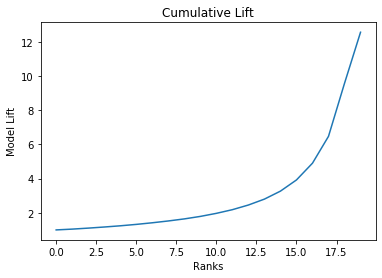

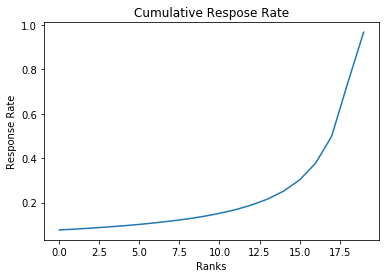

In [21]:
with torch.no_grad():
    model_test_other.eval()
    for x_t, y_t in dataLpader_test_other:
        pred_prob_other = model_test_other(x_t.float())
        y_other = pd.DataFrame(torch.cat( (pred_prob_other, y_t.reshape(-1, 1).float()) , 1).numpy(), columns=['prob', 'target'])
Lift = Model.ModelLift(c=20)
lift = Lift.calLift(y_other, target='target', prob='prob')
Model.Plot(lift)

### Performance of all data without content

    rank  cnt          prob  target
19    19  339  9.987984e-01   296.0
18    18  339  5.698719e-01   202.0
17    17  339  2.157866e-03     8.0
16    16  339  2.896444e-04     3.0
15    15  339  7.819180e-05     1.0
14    14  339  2.454600e-05     1.0
13    13  339  7.107959e-06     0.0
12    12  339  2.394483e-06     1.0
11    11  336  7.037855e-07     0.0
10    10  342  1.964285e-07     1.0


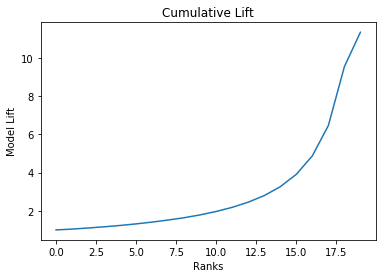

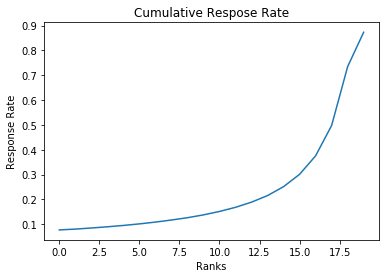

In [20]:
with torch.no_grad():
    model_test.eval()
    for x_t, y_t in dataLoader_test:
        pass
        pred_prob_test = model_test(x_t.float())
        y = pd.DataFrame(torch.cat( (pred_prob_test, y_t.reshape(-1, 1).float()) , 1).numpy(), columns=['prob', 'target'])
Lift = Model.ModelLift(c=20)
lift = Lift.calLift(y, target='target', prob='prob')
Model.Plot(lift)